# Regresión y clasificación

### Parte 1:
## Autor:Wilgen Correa
### Fecha; 30-04-2021
### Construya una red neuronal  de clasificación binaria para predecir el cáncer de seno. Use los datos Breast Cancer Wisconsin. Los datos los puede encontrar en el enlace de Kaggle.

## Meta-información sobre los datos
* ID number
* Diagnosis (M = maligno, B = benigno)
Se calculan diez características de valor real para cada núcleo celular:
* radius (media de las distancias desde el centro a los puntos del perímetro)
* texture (desviación estándar de los valores de la escala de grises)
* perimeter
* area
* smoothness (variación local en las longitudes de los radios)
* compactness (perímetro ^ 2 / área - 1.0)
* concavity (severidad de las porciones cóncavas del contorno)
* concave points (número de porciones cóncavas del contorno)
* symetry
* fractal dimension ("aproximación de la línea de costa"
La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.
Todos los valores de las características se recodifican con cuatro dígitos significativos.
datos faltantes: ninguno
Distribución de clases: 357 benignos, 212 malignos
"""

### Importar las librerias

In [87]:

# Importar las librerias
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import plot_model
#
print(tf.__version__)


2.4.1


## Cargar los datos y describirlos 
### Cargar los datos desde el CSV local y describir la fuente de datos. Los datos corresponden.

In [88]:
# Cargar los datos y describirlos 
df = pd.read_csv("dataCancer.csv", index_col=0)
del df['Unnamed: 32']

## Preprocesamiento

In [89]:
## Preparación de los datos.
df_X = df.iloc[:,1:] # extrae como tensores numpy
df_Y = df.apply(lambda x: 1 if x['diagnosis'] == 'M' else 0, axis=1)

### Describir los dados iniciales
### Acercamiento descriptivo a los datos


In [90]:
## Describir los dados iniciales
## Acercamiento descriptivo a los datos
df_describe = df.describe().transpose()
#print(df.describe().transpose())

### Se saca la correlación de las variables

In [91]:
# Se saca la correlación de las variables

correlation_data = df.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


#  Preparamos los datos de entrenamiento y testeo

In [92]:
training_features , test_features ,training_labels, test_labels = train_test_split(df_X , df_Y , test_size=0.2)

print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[0])
print('No. of columns in Test Features: ', test_features.shape[0])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[0])
print('No. of columns in Test Label: ', test_labels.shape[0])
stats = training_features.describe()
stats = stats.transpose()
stats
stats = test_features.describe()
stats = stats.transpose()


No. of rows in Training Features:  455
No. of rows in Test Features:  114
No. of columns in Training Features:  455
No. of columns in Test Features:  114
No. of rows in Training Label:  455
No. of rows in Test Label:  114
No. of columns in Training Label:  455
No. of columns in Test Label:  114


### Normalizacion de los datos


In [93]:
# Normalizacion de los datos
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

### Defina el generador de la entrada de datos


In [94]:
# Defina el generador de la entrada de datos
def get_input_fn(data_training, data_labels): 
    dataset = tf.data.Dataset.from_tensor_slices((dict(data_training), data_labels))\
        .shuffle(True).batch(32).repeat(1)
    return dataset

## Modelo ANN

In [95]:
# Modelo ANN
train_fn_feeds = lambda: get_input_fn(normed_train_features,training_labels)
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)
logistic_model.train(train_fn_feeds)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpoll5e8f3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

## Predicciones

In [96]:
#%% Predicciones
testing_fn_feeds = lambda: get_input_fn(normed_train_features, training_labels)
test_fn_feeds = lambda: get_input_fn(normed_test_features, test_labels)

train_predictions = logistic_model.predict(testing_fn_feeds)
test_predictions = logistic_model.predict(test_fn_feeds)
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])

train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoll5e8f3/model.ckpt-15
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoll5e8f3/model.ckpt-15
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### Validación

In [97]:
#%% Validación
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall


train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))

Training Data Accuracy (%) =  98.02
Training Data Precision (%) =  98.17
Training Data Recall (%) =  96.41
--------------------------------------------------
Test Data Accuracy (%) =  97.37
Test Data Precision (%) =  100.0
Test Data Recall (%) =  93.33


# *** Solución mediante un Modelo logístico ***

Segunda parte de la solución usando una red neuronal de modelo logístico con un modelo Sequential modo 2


## Utilizando keras

In [98]:
model_seq2 = keras.models.Sequential()
## Adiciona capas una por una
model_seq2.add(keras.layers.Dense(units=16, activation='relu', input_shape=(30,)))
#Adding dropout to prevent overfitting (regularización)
model_seq2.add(keras.layers.Dropout(0.1)) # 10% out in each epoc
model_seq2.add(keras.layers.Dense(units=16, activation='relu'))
#Adding dropout to prevent overfitting (regularización)
model_seq2.add(keras.layers.Dropout(0.1))
model_seq2.add(keras.layers.Dense(units=1, activation='sigmoid'))

### Compila el modelo


In [99]:
### Compila el modelo
model_seq2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_seq2.summary()
#plot_model(model_seq2, to_file='./img/cancer_seno.png', show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [100]:
history = model_seq2.fit(normed_train_features, training_labels, batch_size=32, epochs=150,validation_split = 0.2)
#%% [markdown]

0.2098 - accuracy: 0.9161 - val_loss: 0.1492 - val_accuracy: 0.9560
Epoch 11/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1932 - accuracy: 0.9361 - val_loss: 0.1323 - val_accuracy: 0.9670
Epoch 12/150
12/12 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9312 - val_loss: 0.1191 - val_accuracy: 0.9670
Epoch 13/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1590 - accuracy: 0.9483 - val_loss: 0.1078 - val_accuracy: 0.9670
Epoch 14/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1174 - accuracy: 0.9689 - val_loss: 0.0979 - val_accuracy: 0.9670
Epoch 15/150
12/12 [==============================] - 0s 5ms/step - loss: 0.1203 - accuracy: 0.9726 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 16/150
12/12 [==============================] - 0s 7ms/step - loss: 0.1405 - accuracy: 0.9609 - val_loss: 0.0830 - val_accuracy: 0.9670
Epoch 17/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1523

### Predicciones

In [101]:
# Predicting the Test set results
y_pred = model_seq2.predict(normed_test_features)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

### Matriz de confusión

Test Data Accuracy (%) =  97.37
Test Data Precision (%) =  97.73
Test Data Recall (%) =  95.56
Our accuracy is 97.36842105263158%


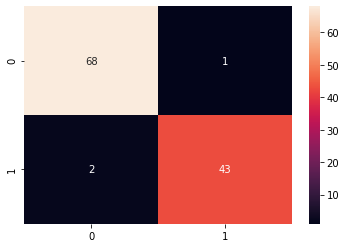

In [102]:
test_accuracy_score2, test_precision_score2, test_recall_score2 = calculate_binary_class_scores(test_labels, y_pred)

print('Test Data Accuracy (%) = ', round(test_accuracy_score2*100,2))
print('Test Data Precision (%) = ', round(test_precision_score2*100,2))
print('Test Data Recall (%) = ', round(test_recall_score2*100,2))


cm = confusion_matrix(test_labels, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/test_labels.shape[0])*100))
sns.heatmap(cm,annot=True)
plt.savefig("img/heatmap.png")

### Evaluación del modelo

In [103]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


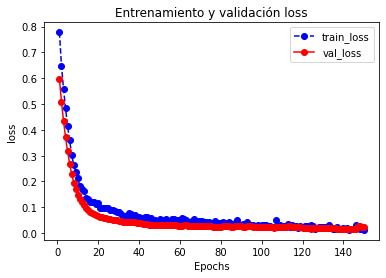

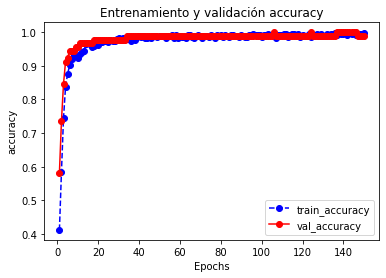

In [104]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')